In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_excel('2018Q3.xlsx', sheet_name=1, skiprows = [0], index_col=0)
data.head(50)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
Austria,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,GOs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,Production,NaN,NaN,Transaction,NaN,NaN,NaN,NaN,NaN
NaN,NaN,Issue,Cancel,Expire,Issue,Transfer,Cancel,Export,Import,Expire
Renewable,Unspecified & other,0,157251,0,0,18,35693,0,170389,0
NaN,Biomass,0,1284802,0,0,374982,235984,0,1217896,0
NaN,Solar,6,40000,0,4,48000,0,4,48000,0
NaN,Geothermal,0,0,0,0,0,0,0,0,0
NaN,Wind,352562,16771,0,151419,14974,14974,151419,14974,0
NaN,Hydro,12143334,13573094,0,10097686,19193489,15473828,13124384,17801627,0


# Get the raw data structured

In [3]:
# First, get a list of all the countries, so that you can use it for MultiIndex later
# Clean the data so that you can use hierarchical indexing on rows and columns
country_list = []
for country_num in range(0, len(data.index), 19):
    country_list.append(data.index[country_num])
#country_list

In [4]:
# Secont, after having got all country names, get rid of the first tree rows for each country 
# (except for the first country, where only the first 2 rows are in excess)

drop_list = list(range(0, len(data.index), 19)) + list(range(1, len(data.index), 19)) + \
list(range(18, len(data.index), 19)) + list(range(16, len(data.index), 19))
drop_list.sort()

# Keep only the rows placed at indxes not present in the dorp_list
keep_list = [item for item in range(len(data)) if item not in drop_list]
data = data.iloc[keep_list]
data.drop(index = 'TOTAL', inplace=True)

data.head(20)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
NaN,NaN,Production,NaN,NaN,Transaction,NaN,NaN,NaN,NaN,NaN
NaN,NaN,Issue,Cancel,Expire,Issue,Transfer,Cancel,Export,Import,Expire
Renewable,Unspecified & other,0,157251,0,0,18,35693,0,170389,0
NaN,Biomass,0,1284802,0,0,374982,235984,0,1217896,0
NaN,Solar,6,40000,0,4,48000,0,4,48000,0
NaN,Geothermal,0,0,0,0,0,0,0,0,0
NaN,Wind,352562,16771,0,151419,14974,14974,151419,14974,0
NaN,Hydro,12143334,13573094,0,10097686,19193489,15473828,13124384,17801627,0
Nuclear,NaN,0,0,0,0,0,0,0,0,0
Fossil,Unspecified & other,0,0,0,63600,41994,30028,63600,94111,0


In [5]:
len(data)

308

In [6]:
# 3-level rows MultiIndex - country, [renewable, newclear, fossil], type
first = []
for country in country_list:
    first = first + [country]*12
second = list(data.index.unique().dropna())
second = [second[0]]*6 + [second[1]] + [second[2]]*5
second = second*len(country_list)
third = list(data.iloc[2:14, 0])
third = third*len(country_list)

# 2-level Columns MultiIndex:
cfirts = list(data.iloc[0].dropna().unique())
cfirst = [cfirts[0]]*3 + [cfirts[1]]*6
csecond = list(data.iloc[1].dropna())

In [7]:
# Get rid of the rows containing the first two levels for the multi_column_index
drop1 = list(range(0, len(data), 14)) + list(range(1, len(data), 14))
drop1.sort()
keep1 = [item for item in range(len(data)) if item not in drop1]
data = data.iloc[keep1]

In [8]:
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
Renewable,Unspecified & other,0,157251,0,0,18,35693,0,170389,0
NaN,Biomass,0,1284802,0,0,374982,235984,0,1217896,0
NaN,Solar,6,40000,0,4,48000,0,4,48000,0
NaN,Geothermal,0,0,0,0,0,0,0,0,0
NaN,Wind,352562,16771,0,151419,14974,14974,151419,14974,0


In [9]:
list(zip(first, second, third))

[('Austria', 'Renewable', 'Unspecified & other'),
 ('Austria', 'Renewable', 'Biomass'),
 ('Austria', 'Renewable', 'Solar'),
 ('Austria', 'Renewable', 'Geothermal'),
 ('Austria', 'Renewable', 'Wind'),
 ('Austria', 'Renewable', 'Hydro'),
 ('Austria', 'Nuclear', nan),
 ('Austria', 'Fossil', 'Unspecified & other'),
 ('Austria', 'Fossil', 'Hard coal'),
 ('Austria', 'Fossil', 'Lignite (or brown coal)'),
 ('Austria', 'Fossil', 'Oil'),
 ('Austria', 'Fossil', 'Natural Gas'),
 ('Belgium', 'Renewable', 'Unspecified & other'),
 ('Belgium', 'Renewable', 'Biomass'),
 ('Belgium', 'Renewable', 'Solar'),
 ('Belgium', 'Renewable', 'Geothermal'),
 ('Belgium', 'Renewable', 'Wind'),
 ('Belgium', 'Renewable', 'Hydro'),
 ('Belgium', 'Nuclear', nan),
 ('Belgium', 'Fossil', 'Unspecified & other'),
 ('Belgium', 'Fossil', 'Hard coal'),
 ('Belgium', 'Fossil', 'Lignite (or brown coal)'),
 ('Belgium', 'Fossil', 'Oil'),
 ('Belgium', 'Fossil', 'Natural Gas'),
 ('Switzerland', 'Renewable', 'Unspecified & other'),
 ('S

In [10]:
list(zip(cfirst, csecond))

[('Production', 'Issue'),
 ('Production', 'Cancel'),
 ('Production', 'Expire'),
 ('Transaction', 'Issue'),
 ('Transaction', 'Transfer'),
 ('Transaction', 'Cancel'),
 ('Transaction', 'Export'),
 ('Transaction', 'Import'),
 ('Transaction', 'Expire')]

In [11]:
row_multi_ix = pd.MultiIndex.from_tuples(list(zip(first, second, third)))
row_multi_ix
col_multi_ix = pd.MultiIndex.from_tuples(list(zip(cfirst, csecond)))
col_multi_ix

MultiIndex(levels=[['Production', 'Transaction'], ['Cancel', 'Expire', 'Export', 'Import', 'Issue', 'Transfer']],
           labels=[[0, 0, 0, 1, 1, 1, 1, 1, 1], [4, 0, 1, 4, 5, 0, 2, 3, 1]])

In [12]:
data1 = data.iloc[:, 1:]
arr = np.array(data1)
arr

array([[0, 157251, 0, ..., 0, 170389, 0],
       [0, 1284802, 0, ..., 0, 1217896, 0],
       [6, 40000, 0, ..., 4, 48000, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3078446, 3078533, 535849, ..., 1561216, 2189593, 351604]],
      dtype=object)

In [13]:
df = DataFrame(arr, index = row_multi_ix, columns = col_multi_ix)
df.index.names = ['Country', 'Type of Eng', 'Source']
df.head(25)

Production                    \
                                                     Issue    Cancel  Expire   
Country     Type of Eng Source                                                 
Austria     Renewable   Unspecified & other              0    157251       0   
                        Biomass                          0   1284802       0   
                        Solar                            6     40000       0   
                        Geothermal                       0         0       0   
                        Wind                        352562     16771       0   
                        Hydro                     12143334  13573094       0   
            Nuclear     NaN                              0         0       0   
            Fossil      Unspecified & other              0         0       0   
                        Hard coal                        0         0       0   
                        Lignite (or brown coal)          0         0       0   
                        Oil                              0         0       0   
                        Natural Gas                 627818   1087453       0   
Belgium     Renewable   Unspecified & other              0     46085       0   
                        Biomass                    3253550   1989730   36240   
                        Solar                       550675     93921  341103   
                        Geothermal                       0    129686       0   
                        Wind                       5983085   1356092   69821   
                        Hydro                       197120   3360198   39388   
            Nuclear     NaN                              0         0       0   
            Fossil      Unspecified & other              0         0       0   
                        Hard coal                        0         0       0   
                        Lignite (or brown coal)          0         0       0   
                        Oil                              0         0       0   
                        Natural Gas                      0         0       0   
Switzerland Renewable   Unspecified & other              0         0       0   

                                                Transaction            \
                                                      Issue  Transfer   
Country     Type of Eng Source                                          
Austria     Renewable   Unspecified & other               0        18   
                        Biomass                           0    374982   
                        Solar                             4     48000   
                        Geothermal                        0         0   
                        Wind                         151419     14974   
                        Hydro                      10097686  19193489   
            Nuclear     NaN                               0         0   
            Fossil      Unspecified & other           63600     41994   
                        Hard coal                         0         0   
                        Lignite (or brown coal)           0         0   
                        Oil                               0         0   
                        Natural Gas                  540012   1202924   
Belgium     Renewable   Unspecified & other               0    148142   
                        Biomass                     3840213   5662184   
                        Solar                        561261    387583   
                        Geothermal                        0     64662   
                        Wind                        5356601   7960779   
                        Hydro                        262305  18041001   
            Nuclear     NaN                               0         0   
            Fossil      Unspecified & other               0         0   
                        Hard coal                         0         0   
                        Lignite (or brown coal)        

In [14]:
# Thereis no data for Slovenia and Portugal, then drop the rows for these two countries
eng_types = df.drop(['ALL COUNTRIES', 'Slovenia', 'Portugal'], level = 0)
eng_types = eng_types.groupby('Type of Eng', axis = 0, level = 1).sum()
eng_types

Production                          Transaction               \
                    Issue       Cancel     Expire        Issue     Transfer   
Type of Eng                                                                   
Fossil       6.052907e+06    3555362.0  1054772.0    5880036.0    3578337.0   
Nuclear      1.943082e+07   14316302.0  3068095.0   19160112.0          0.0   
Renewable    5.272991e+08  398348823.0  7403955.0  527750866.0  421284981.0   

                                                                
                  Cancel       Export       Import      Expire  
Type of Eng                                                     
Fossil         4359234.0    2614265.0    2488773.0    913256.0  
Nuclear       11615035.0    1594050.0      81193.0   5924812.0  
Renewable    470014203.0  425682914.0  426482306.0  33467810.0

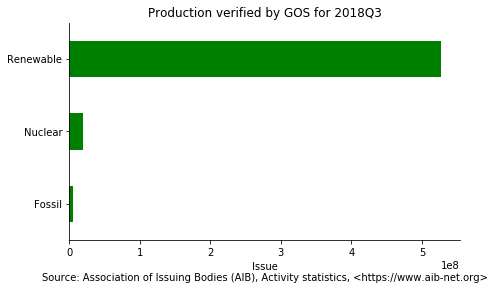

In [15]:
eng_types['Production']['Issue'].sort_values().plot(kind = 'barh', figsize = (7, 4), colormap = 'ocean')
plt.xlabel('Issue\nSource: Association of Issuing Bodies (AIB), Activity statistics, \
<https://www.aib-net.org>')
plt.ylabel('')
plt.title('Production verified by GOS for 2018Q3')
sns.despine()

# Energy produced and verified by GOs for the third quarter of 2018 is primarily from REC 
# Amongstthe REC

In [16]:
# As long as we are interested only in the renewable sources of energy, we can keep the relevent info only
# Thereis no data for Slovenia and Portugal, then drop the rows for these two countries
renewable_df = df.xs('Renewable', axis = 0, level = 1)
renewable_df = renewable_df.drop(['ALL COUNTRIES', 'Slovenia', 'Portugal'], level = 0)
renewable_df.head()

Production                 Transaction           \
                                 Issue   Cancel Expire       Issue Transfer   
Country Source                                                                
Austria Unspecified & other          0   157251      0           0       18   
        Biomass                      0  1284802      0           0   374982   
        Solar                        6    40000      0           4    48000   
        Geothermal                   0        0      0           0        0   
        Wind                    352562    16771      0      151419    14974   

                                                             
                             Cancel  Export   Import Expire  
Country Source                                               
Austria Unspecified & other   35693       0   170389      0  
        Biomass              235984       0  1217896      0  
        Solar                     0       4    48000      0  
        Geothermal                0       0        0      0  
        Wind                  14974  151419    14974      0

In [17]:
renewable_df.groupby('Source', axis = 0, level = 1).sum()['Production']['Issue'].sort_values()

Source
Unspecified & other    2.835050e+06
Geothermal             5.231356e+06
Solar                  2.571414e+07
Biomass                4.790920e+07
Wind                   1.072862e+08
Hydro                  3.383231e+08
Name: Issue, dtype: float64

In [87]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.titlesize':'x-large'}
pylab.rcParams.update(params)

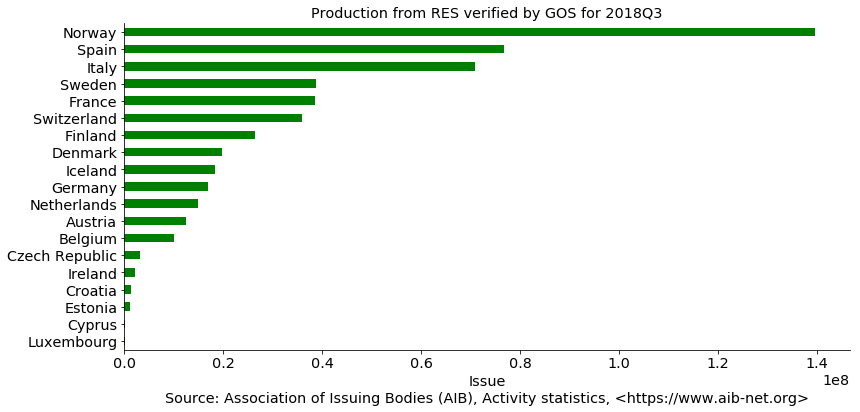

In [72]:
country_groups = renewable_df.groupby(by = 'Country', level = 0).sum()

fig1 = plt.figure()
country_groups['Production']['Issue'].sort_values().plot(kind = 'barh', figsize = (13, 6), colormap = 'ocean')
plt.xlabel('Issue\nSource: Association of Issuing Bodies (AIB), Activity statistics, \
<https://www.aib-net.org>')
plt.ylabel('')
plt.title('Production from RES verified by GOS for 2018Q3')
sns.despine()
fig1.savefig('fig1', dpi = 200)

# We can see BELOW that Norway is the highest producer of energy from RES for the third qarter of 2018.
# After that come Spain, Italy,, Sweden and France.
# There are 6 European countries wich produces and sertifies energy from RES but account each for less than
# 1 % ot the total production for the third quarter. These are Luxembourg, Cyprus, Estonia, Croatia, Ireland and the Czech Republic. 

In [21]:
# There are 19 countries left  - Luxemburg, Cyprus, Estonia, Croatia, Ireland, Czech Republic have less than 1% 
# each of the production from renewables
share = country_groups['Production']['Issue'].sort_values()/country_groups['Production']['Issue'].sort_values().sum()
# Get the names of the countries with production share less than 1%
small = []
for ix, value in enumerate(share):
    if value <=0.01:
        small.append(share.iloc[[ix]].index.get_values()[0])    
not_small = [cty_name for cty_name in country_groups.index if cty_name not in small]
small

['Luxembourg', 'Cyprus', 'Estonia', 'Croatia', 'Ireland', 'Czech Republic']

In [108]:
pie_chart_data = country_groups['Production']['Issue'].sort_values().loc[not_small]
pie_chart_data['Total for countries with share < 1%'] = country_groups['Production']['Issue'].sort_values().loc[small].sum()
pie_df = DataFrame(pie_chart_data/pie_chart_data.sum())
pie_df.to_csv('Share.csv')

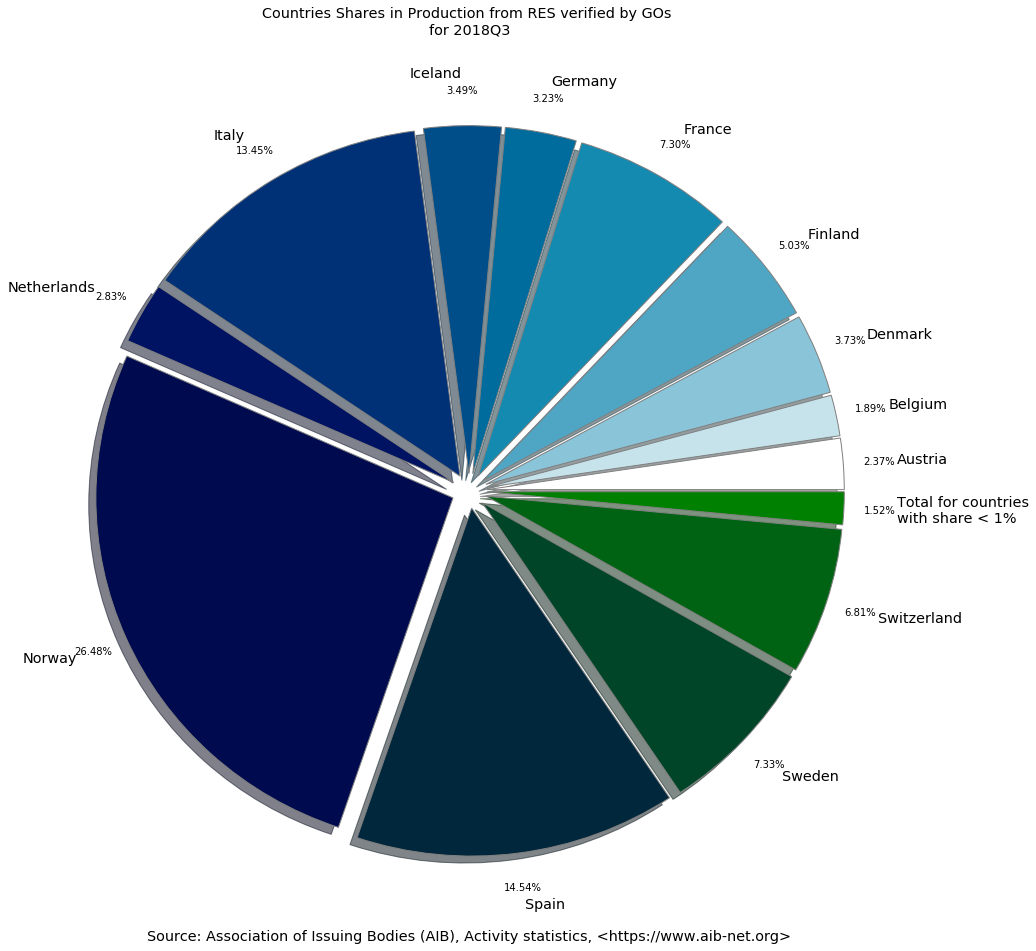

In [80]:
fig2 = plt.figure()
pie_chart_data.plot(kind = 'pie', figsize = (16,16), colormap = 'ocean_r',
                    shadow = True, wedgeprops = {'edgecolor': 'gray'}, 
                    explode = [0.05 for n in range(len(pie_chart_data))],
                    autopct = '%.2f%%', pctdistance = 1.1, 
                    labeldistance = 1.15)
plt.xlabel('Source: Association of Issuing Bodies (AIB), Activity statistics, <https://www.aib-net.org>')
plt.title('Countries Shares in Production from RES verified by GOs \nfor 2018Q3\n')
plt.ylabel('')
plt.savefig('fig2', dpi = 300)
# Italy holds the third biggest share of the market with 13,45% of the produced energy from REC, verified by
# GOs. Italy, Switzerland and Germany represend almost one forth (23,49%) of the market.
# The three countries represent the relevent market for NValie Energy, as specified on the company's official website: 'Nvalue focuses on 


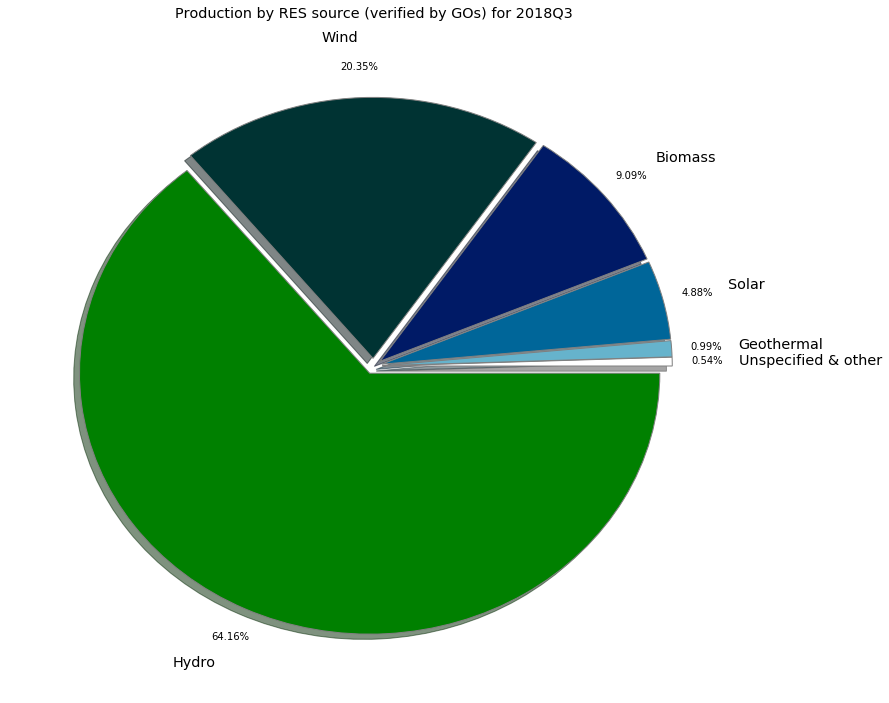

In [86]:
fig3 = plt.figure()
renewable_df.groupby('Source', axis = 0, level = 1).sum()['Production']['Issue'].sort_values().plot(
    kind = 'pie', figsize = (13, 12), colormap = 'ocean_r', shadow = True, wedgeprops = {'edgecolor': 'gray'}, 
                    explode = [0.03 for n in range(6)],
                    autopct = '%.2f%%', pctdistance = 1.12, 
                    labeldistance = 1.23)
plt.xlabel('Issue\nSource: Association of Issuing Bodies (AIB), Activity statistics, \
<https://www.aib-net.org>')
plt.xlabel('')
plt.ylabel('')
plt.title('Production by RES source (verified by GOs) for 2018Q3\n')
sns.despine()
fig3.savefig('fig3', dpr = 300)
# As long as Nvalue's focuses maily on small hydro, wind and photovoltaic technologies, we can have a look at 
# the importance of these sources for the total production. As it seams hydro and wind are of primarily
# importance, with GOs on hydro and wind energy accounting for around 64% and around 20% respectively.

<Figure size 432x288 with 0 Axes>

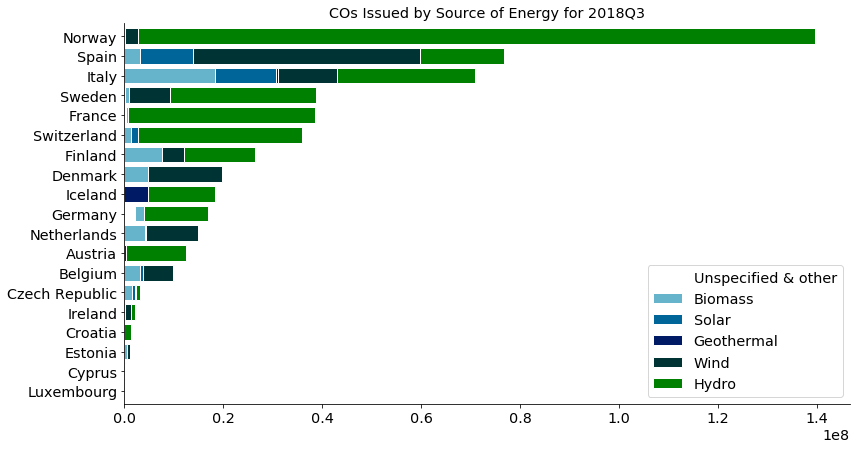

In [68]:
fig4 = plt.figure()
sources = renewable_df[[('Production', 'Issue')]].unstack()
sources.columns = [item[2] for item in sources.columns.get_values()]
sources['Total'] = sources.sum(1)

sources.sort_values(by = 'Total').iloc[:, :-1].plot(kind = 'barh', colormap = 'ocean_r', 
                                                    figsize = (13, 7), stacked = True, 
                                                    edgecolor = 'white', width = 0.8)
plt.ylabel('')
plt.title('COs Issued by Source of Energy for 2018Q3')
sns.despine()
plt.savefig('fig4')

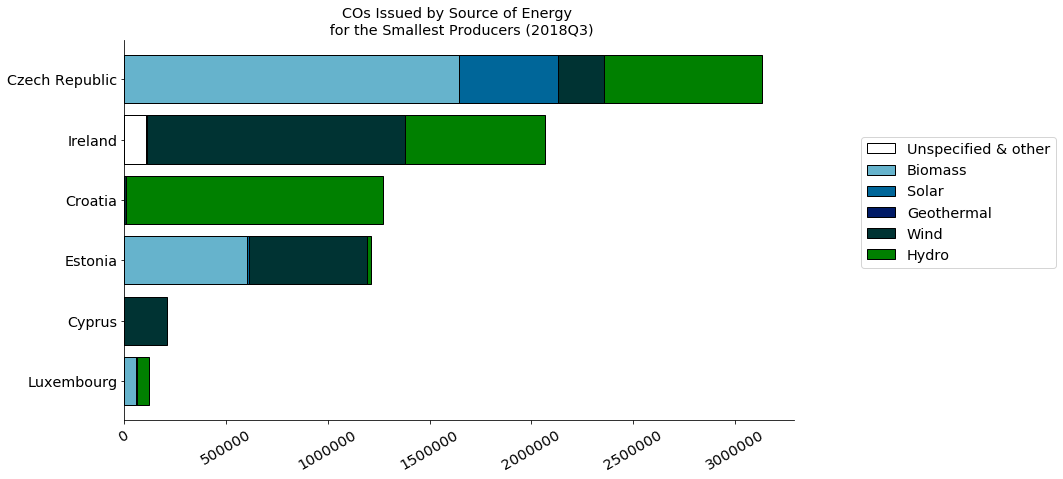

In [26]:
sources = renewable_df[[('Production', 'Issue')]].unstack()
sources.columns = [item[2] for item in sources.columns.get_values()]
sources['Total'] = sources.sum(1)

# Zoom the graph on the countries with smallest share
sources.sort_values(by = 'Total').iloc[:len(small), :-1].plot(kind = 'barh', colormap = 'ocean_r', 
                                                    figsize = (12, 7), stacked = True, 
                                                    edgecolor = 'black', width = 0.8)
#.plot(kind = 'barh', figsize = (12, 6), colormap = 'plasma')
plt.ylabel('')
plt.title('COs Issued by Source of Energy \n for the Smallest Producers (2018Q3)')
plt.legend(loc=(1.1, 0.4))
plt.xticks(rotation = 30)
sns.despine()

# Do not include this

<Figure size 432x288 with 0 Axes>

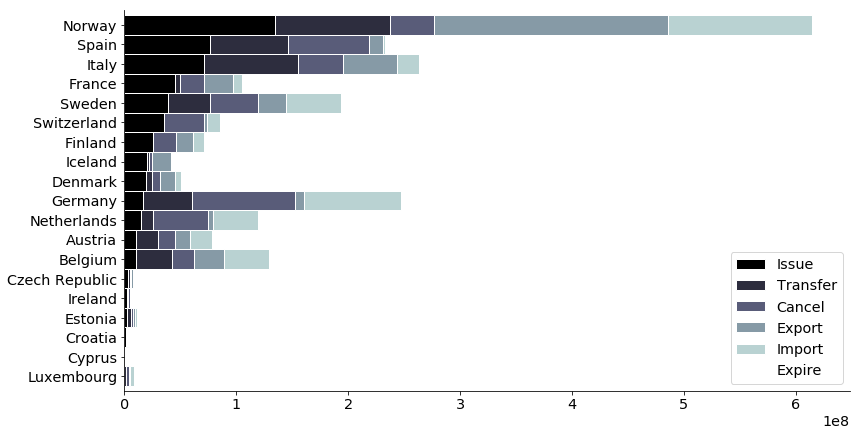

In [67]:
fig5 = plt.figure()
country_groups['Transaction'].sort_values(by = 'Issue').plot(kind = 'barh', figsize = (13, 7), width = 1, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'bone')
plt.legend(loc = 'lower right')
plt.ylabel('')
plt.title
sns.despine()
plt.savefig('fig5', dpr = 200)

<Figure size 432x288 with 0 Axes>

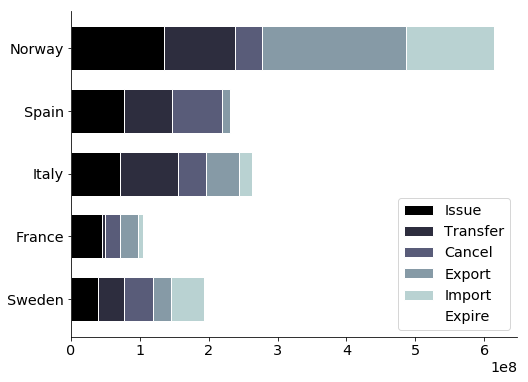

In [66]:
# Again zoom in the largest 5 countries
fig6 = plt.figure()
country_groups['Transaction'].sort_values(by = 'Issue').iloc[-5:].plot(kind = 'barh', figsize = (8, 6), width = 0.7, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'bone')
plt.legend(loc = 'lower right')
plt.ylabel('')
plt.title
sns.despine()
plt.savefig('fig6', dpr = 200)

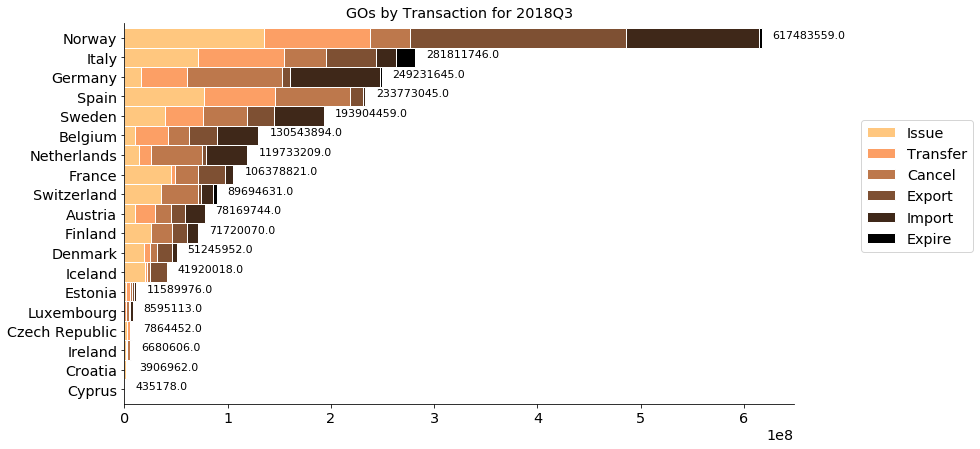

In [29]:
country_groups['Total Transactions'] = country_groups['Transaction'].sum(1)

country_groups.sort_values(by = 'Total Transactions')['Transaction'].plot(kind = 'barh', figsize = (12, 7), width = 1, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'copper_r')
plt.legend(loc = (1.1, 0.4))
plt.ylabel('')
plt.title('GOs by Transaction for 2018Q3')
countries = [val for val in country_groups.sort_values(by = 'Total Transactions')['Total Transactions']]
for index, value in enumerate(countries):
    plt.text(x = value+10000000, y = index, s = value, fontsize = 11)
sns.despine()


<Figure size 432x288 with 0 Axes>

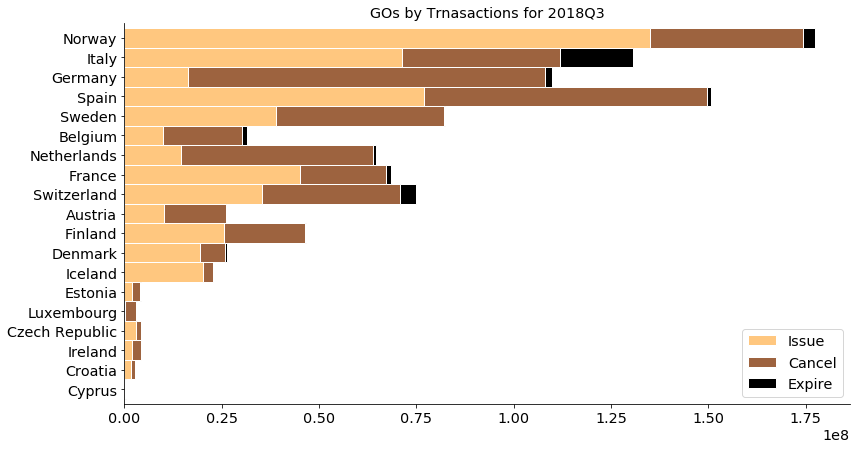

In [65]:
fig7 = plt.figure()
country_groups.sort_values(by = 'Total Transactions')['Transaction'][['Issue', 'Cancel', 'Expire']].plot(kind = 'barh', figsize = (13, 7), width = 1, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'copper_r')
plt.legend(loc = 'lower right')
plt.ylabel('')
plt.title('GOs by Trnasactions for 2018Q3')
sns.despine()
plt.savefig('fig7', dpr = 200)
# From the figure, we observe that there is not a perfectly balanced relationship between supply and demand. The main reason is that the demand for GOs does not imply higher supply: Higher supply depends on the legal framework in the different countries and the actual renewable energy production.
# The main finding of interest is that the share of the unused (expired, unconsumed) GOs is relativle high
# for Italy, which it the 3rd bigesst market. SO their is either a legal drawback, or room for improvement in
# terms of trading opportunities. 

<Figure size 432x288 with 0 Axes>

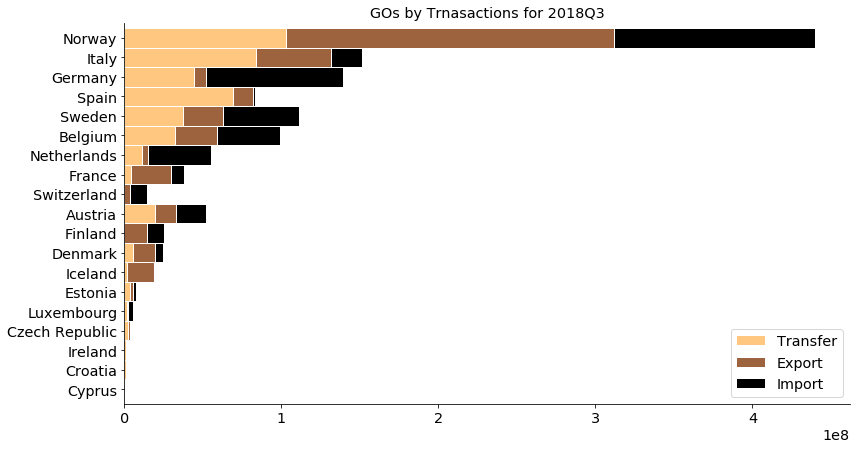

In [64]:
fig8 = plt.figure()
country_groups.sort_values(by = 'Total Transactions')['Transaction'][['Transfer', 'Export', 'Import']].plot(kind = 'barh', figsize = (13, 7), width = 1, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'copper_r')
plt.legend(loc = 'lower right')
plt.ylabel('')
plt.title('GOs by Trnasactions for 2018Q3')
sns.despine()
plt.savefig('fig8', dpr = 200)
# The trading activity analysis reveal that Norway, Italy and France have realtively high export activity, 
# while the import activity of Norway, German and Sweden is relatively high as compared to the other
# traiding options (transfer and export). 

<Figure size 432x288 with 0 Axes>

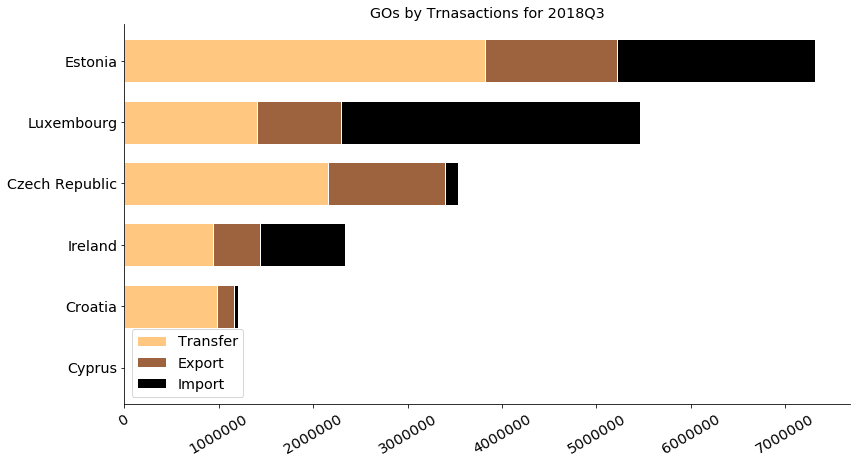

In [61]:
# Again zoom in to see better the results for the smallest countries
fig9 = plt.figure()
country_groups.sort_values(by = 'Total Transactions')['Transaction'][['Transfer', 'Export', 'Import']].iloc[:len(small)].plot(kind = 'barh', figsize = (13, 7), width = 0.7, 
                                                            edgecolor = 'white', stacked = True, 
                                                            colormap = 'copper_r')
plt.ylabel('')
plt.xticks(rotation = 30)
plt.title('GOs by Trnasactions for 2018Q3')
sns.despine()
plt.savefig('fig9', dpr = 200)

In [33]:
# According to the information on the company's official website: 'Nvalue focuses on 
# small local renewable energy projects in Switzerland, Germany and Italy with priority to small hydro, wind and photovoltaic technologies.'
# Invesstigate the three countries closer

country_groups.sort_values(by = 'Total Transactions')

Production                         Transaction               \
                       Issue      Cancel     Expire        Issue     Transfer   
Country                                                                         
Cyprus          2.083999e+05         0.0        0.0     210614.0          0.0   
Croatia         1.269074e+06   1224498.0     8030.0    1738230.0     979391.0   
Ireland         2.064629e+06   2481929.0    18180.0    2021089.0     941678.0   
Czech Republic  3.133233e+06   1282157.0    25784.0    2897100.0    2159146.0   
Luxembourg      1.194100e+05   3100421.0        2.0     106055.0    1409839.0   
Estonia         1.214244e+06    110658.0        0.0    1960454.0    3822020.0   
Iceland         1.842813e+07   3601748.0     2808.0   20081290.0    1961511.0   
Denmark         1.966899e+07   9578393.0    31807.0   19371001.0    5491178.0   
Finland         2.651150e+07  23194399.0   169236.0   25603169.0          0.0   
Austria         1.249590e+07  15071918.0        0.0   10249109.0   19631463.0   
Switzerland     3.588305e+07  41297495.0   710237.0   35320697.0          0.0   
France          3.848861e+07  28482036.0   413901.0   45206289.0    4292389.0   
Netherlands     1.493924e+07  48337210.0   339831.0   14523306.0   11062802.0   
Belgium         9.984430e+06   6975712.0   486552.0   10020380.0   32264351.0   
Sweden          3.866635e+07  43297858.0    96197.0   39001347.0   37247787.0   
Spain           7.667989e+07  62306313.0  2053533.0   76867701.0   69334262.0   
Germany         1.700965e+07  13051196.0    40025.0   16347808.0   44298553.0   
Italy           7.089890e+07  46255907.0   294388.0   71273042.0   83592879.0   
Norway          1.396354e+08  48698975.0  2713444.0  134952185.0  102795732.0   

                                                                  \
                    Cancel       Export       Import      Expire   
Country                                                            
Cyprus                 0.0          0.0          0.0    224564.0   
Croatia           961670.0     176952.0      50357.0       362.0   
Ireland          2287547.0     491224.0     904634.0     34434.0   
Czech Republic   1343362.0    1231732.0     144585.0     88527.0   
Luxembourg       3018938.0     881484.0    3168096.0     10701.0   
Estonia          2131206.0    1398725.0    2095516.0    182055.0   
Iceland          2583179.0   17115364.0     164004.0     14670.0   
Denmark          6590533.0   14284123.0    5139728.0    369389.0   
Finland         20884867.0   14554562.0   10577306.0    100166.0   
Austria         15760479.0   13275807.0   19252886.0         0.0   
Switzerland     35589836.0    3332662.0   11406404.0   4045032.0   
France          21980930.0   25666327.0    8018716.0   1214170.0   
Netherlands     49363455.0    4002445.0   40111844.0    669357.0   
Belgium         20113429.0   26911645.0   39826922.0   1407167.0   
Sweden          43010681.0   25288240.0   48971674.0    384730.0   
Spain           72748057.0   12520719.0    1330000.0    972306.0   
Germany         91739136.0    7765002.0   87305142.0   1776004.0   
Italy           40626542.0   47833670.0   19732634.0  18752979.0   
Norway          39280356.0  208952231.0  128281858.0   3221197.0   

               Total Transactions  
                                   
Country                            
Cyprus                   435178.0  
Croatia                 3906962.0  
Ireland                 6680606.0  
Czech Republic          7864452.0  
Luxembourg              8595113.0  
Estonia                11589976.0  
Iceland                41920018.0  
Denmark                51245952.0  
Finland                71720070.0  
Austria                78169744.0  
Switzerland            89694631.0  
France                106378821.0  
Netherlands           119733209.0  
Belgium               130543894.0  
Sweden                193904459.0  
Spain                 233773045.0  
Germany               249231645.0  
Italy             

<Figure size 432x288 with 0 Axes>

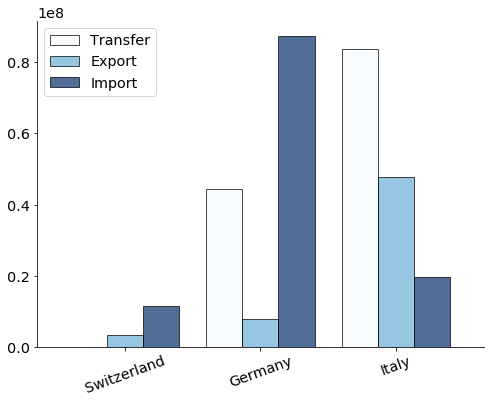

In [58]:
fig10 = plt.figure()
countries_of_interest = country_groups.loc[['Switzerland', 'Germany', 'Italy']]
countries_of_interest['Transaction'][[ 'Transfer', 'Export', 'Import']].plot(kind = 'bar', figsize=(8,6), 
                                                                                  colormap = 'Blues', width = 0.8, 
                                                                                  edgecolor = 'black', alpha = 0.7)
plt.xticks(rotation = 20)
plt.xlabel('')
sns.despine()
plt.savefig('fig10', dpr = 200)
# The three countries of greatest importens fore the company - Switzerland, Germany and Italy also show 
# certain trading patterns. Evidently the only country that is less dependant on import is Italy and the country
# can meet greater internal trading, while Germany imports the greatest ammount of GOs.  
# 


<Figure size 432x288 with 0 Axes>

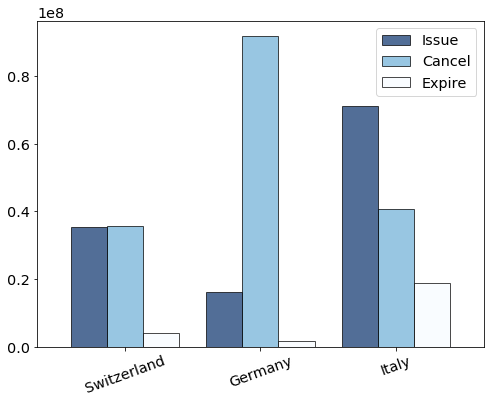

In [57]:
fig11 = plt.figure()
countries_of_interest['Transaction'][['Issue', 'Cancel', 'Expire']].plot(kind = 'bar', figsize=(8,6), 
                                                                         colormap = 'Blues_r', width = 0.8, 
                                                                         edgecolor = 'black', alpha = 0.7)

plt.xlabel('')
plt.xticks(rotation = 20)
plt.savefig('fig11')
# The energy (GOs) that Germany imports and issues is to a great expend consumed and 
# This might reflect the higher environmental consciousness of the citisens. 

In [36]:
country_groups.sort_values(by = 'Total Transactions', ascending=False)['Transaction'][['Transfer', 'Export', 'Import']]

,Transfer,Export,Import
Country,,,
Norway,102795732.0,208952231.0,128281858.0
Italy,83592879.0,47833670.0,19732634.0
Germany,44298553.0,7765002.0,87305142.0
Spain,69334262.0,12520719.0,1330000.0
Sweden,37247787.0,25288240.0,48971674.0
Belgium,32264351.0,26911645.0,39826922.0
Netherlands,11062802.0,4002445.0,40111844.0
France,4292389.0,25666327.0,8018716.0
Switzerland,0.0,3332662.0,11406404.0


In [37]:
data.index.unique().dropna()

Index(['Renewable', 'Nuclear', 'Fossil'], dtype='object')

In [38]:
list(data.iloc[2:14, 0])

['Solar',
 'Geothermal',
 'Wind',
 'Hydro',
 nan,
 'Unspecified & other',
 'Hard coal',
 'Lignite (or brown coal)',
 'Oil',
 'Natural Gas',
 'Unspecified & other',
 'Biomass']

In [39]:
data.iloc[0].dropna().unique()

array(['Unspecified & other', 0, 157251, 18, 35693, 170389], dtype=object)

In [40]:
data.iloc[1].dropna()

Unnamed: 1     Biomass
Unnamed: 2           0
Unnamed: 3     1284802
Unnamed: 4           0
Unnamed: 5           0
Unnamed: 6      374982
Unnamed: 7      235984
Unnamed: 8           0
Unnamed: 9     1217896
Unnamed: 10          0
Name: nan, dtype: object